# Importing Dependencies

In [1]:
#import libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sb
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, cross_validate, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier
import xgboost as xgb

# Data Description and Exploration

In [3]:
# read data 

data = pd.read_csv('premier_train_dataset_2target.csv')
data.drop(data.columns[0],axis=1,inplace=True)

data[40:50]



#HTGS       - Home Team Goals Scored (so far in the league)
#ATGS       - Away Team Goals Scored (so far in the league)
#HTGC       - Home Team Goals Conceded (so far in the league)
#ATGC       - Away Team Goals Conceded (so far in the league)
#FTHG       - Full Time Home Goals (in the match)
#FTAG       - Full Time Away Goals (in the match)
#FTR        - Full Time Result (H- Home Win; D - Draw; A - Away Win)
#HomeTeamLP - Home Team League Position
#AwayTeamLP - Away Team League Position
#HTFormPts  - Home Team sum of points in the last 5 games
#ATFormPts  - Away Team sum of points in the last 5 games
#HTGD       - Home Team Goal Diference (so far in the league)
#ATGD       - Away Team Goal Diference (so far in the league)
#MW         - Match Week
#HTGS       - Home Team Points (so far in the league)
#ATGS       - Away Team Points (so far in the league)

,HomeTeam,AwayTeam,HTGS,ATGS,HTGC,ATGC,FTHG,FTAG,FTR,HomeTeamLP,AwayTeamLP,HTFormPts,ATFormPts,HTGD,ATGD,MW,HTP,ATP
40,Coventry,Leeds,5,5,7,3,0,0,NH,14.0,3.0,6,7,0,0,5.0,7,4
41,Ipswich,Aston Villa,4,4,6,5,1,2,NH,18.0,6.0,4,5,-1,-1,5.0,4,4
42,Leicester,Southampton,3,7,1,8,1,0,H,8.0,15.0,8,3,3,-2,5.0,10,2
43,Liverpool,Man City,7,7,6,9,3,2,H,4.0,18.0,7,6,1,1,5.0,7,6
44,Man United,Sunderland,11,4,3,6,3,0,H,1.0,7.0,8,4,9,-6,5.0,8,1
45,Middlesbrough,Everton,8,7,7,7,1,2,NH,12.0,13.0,5,4,-2,3,5.0,2,7
46,Newcastle,Chelsea,7,7,4,7,0,0,NH,11.0,5.0,9,5,5,-2,5.0,10,3
47,Derby,Charlton,9,8,10,9,2,2,NH,16.0,18.0,3,4,-1,-5,5.0,3,2
48,Tottenham,West Ham,7,5,6,8,1,0,H,10.0,9.0,7,2,0,-2,5.0,7,2
49,Arsenal,Coventry,9,5,6,7,2,1,H,2.0,14.0,7,6,5,-1,5.0,11,7


# Data Preparation

In [4]:
# Separate into feature set and target variable
feature_set = data.drop(['HomeTeam','AwayTeam','FTR', 'FTHG', 'FTAG','MW'],1)
target_set = data['FTR']

cols = [['HTGS','ATGS','HTGC','ATGC','HomeTeamLP','AwayTeamLP', 'HTFormPts','ATFormPts','HTGD','ATGD','HTP','ATP']]
for col in cols:
    feature_set[col] = scale(feature_set[col])
  
    
feature_set[40:50]

,HTGS,ATGS,HTGC,ATGC,HomeTeamLP,AwayTeamLP,HTFormPts,ATFormPts,HTGD,ATGD,HTP,ATP
40,-1.139955,-1.147697,-1.067294,-1.309120,0.654571,-1.324887,-0.069788,0.168843,-0.019236,0.009430,-1.010783,-1.160716
41,-1.199019,-1.206839,-1.128677,-1.185829,1.374374,-0.785035,-0.632534,-0.399262,-0.089016,-0.060746,-1.171777,-1.160716
42,-1.258084,-1.029413,-1.435591,-1.000893,-0.425134,0.834522,0.492958,-0.967368,0.190106,-0.130921,-0.849789,-1.268505
43,-1.021826,-1.029413,-1.128677,-0.939248,-1.144937,1.374374,0.211585,-0.115210,0.050545,0.079605,-1.010783,-1.052927
44,-0.785568,-1.206839,-1.312825,-1.124184,-1.684789,-0.605084,0.492958,-0.683315,0.608789,-0.411623,-0.957119,-1.322399
45,-0.962761,-1.029413,-1.067294,-1.062539,0.294669,0.474620,-0.351161,-0.683315,-0.158797,0.219956,-1.279106,-0.999033
46,-1.021826,-1.029413,-1.251443,-1.062539,0.114719,-0.964986,0.774331,-0.399262,0.329667,-0.130921,-0.849789,-1.214610
47,-0.903697,-0.970271,-0.883146,-0.939248,1.014472,1.374374,-0.913907,-0.683315,-0.089016,-0.341447,-1.225442,-1.268505
48,-1.021826,-1.147697,-1.128677,-1.000893,-0.065232,-0.245183,0.211585,-1.251421,-0.019236,-0.130921,-1.010783,-1.268505
49,-0.903697,-1.147697,-1.128677,-1.062539,-1.504838,0.654571,0.211585,-0.115210,0.329667,-0.060746,-0.796125,-0.999033


# Spliting into Train and Test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(feature_set, target_set, test_size = 0.25, random_state = 23, stratify = target_set)

# Base Models

In [6]:
def basic_train_and_test(clf, X_train, X_test, y_train, y_test):

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    acc_train = sum(y_train == y_pred_train) / float(len(y_pred_train))
    f1_train = f1_score(y_train, y_pred_train, average='weighted')

    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1_train , acc_train))

    y_pred_test = clf.predict(X_test)
    acc_test = sum(y_test == y_pred_test) / float(len(y_pred_test))
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1_test , acc_test))
    
    return y_pred_test

def get_confusion_matrix(clf, y_pred_test, y_test):
    cm = confusion_matrix(y_test, y_pred_test, labels=clf.classes_)
    return cm

def display_cm(clf, cm):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    


## Logistic Regression

F1 score and accuracy score for training set: 0.7839 , 0.7838.
F1 score and accuracy score for test set: 0.7812 , 0.7809.


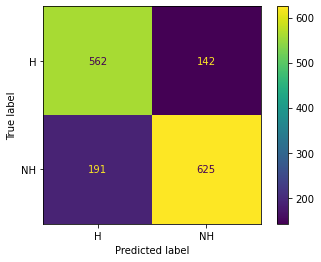

In [7]:
# Logistic Regression
clf_log = LogisticRegression(random_state=24, max_iter=1000, class_weight='balanced')
y_pred_test = basic_train_and_test(clf_log, X_train, X_test, y_train, y_test)
cm = get_confusion_matrix(clf_log, y_pred_test, y_test)
display_cm(clf_log, cm)

## SVM

F1 score and accuracy score for training set: 0.7817 , 0.7825.
F1 score and accuracy score for test set: 0.7789 , 0.7789.


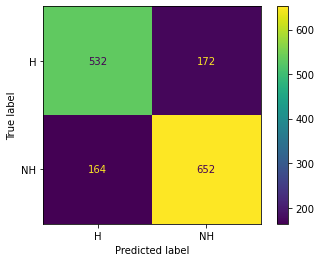

In [8]:
# SVM
clf_svm = SVC(kernel="rbf")
y_pred_test = basic_train_and_test(clf_svm, X_train, X_test, y_train, y_test)
cm = get_confusion_matrix(clf_svm, y_pred_test, y_test)
display_cm(clf_svm, cm)

## Neural Network

F1 score and accuracy score for training set: 0.8093 , 0.8099.
F1 score and accuracy score for test set: 0.7928 , 0.7928.


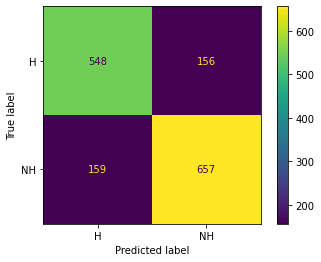

In [9]:
# NN
clf_nn = MLPClassifier(hidden_layer_sizes=(12,12), max_iter=750)
y_pred_test = basic_train_and_test(clf_nn, X_train, X_test, y_train, y_test)
cm = get_confusion_matrix(clf_nn, y_pred_test, y_test)
display_cm(clf_nn, cm)

## XGBoost

F1 score and accuracy score for training set: 0.9868 , 0.9868.
F1 score and accuracy score for test set: 0.7439 , 0.7441.


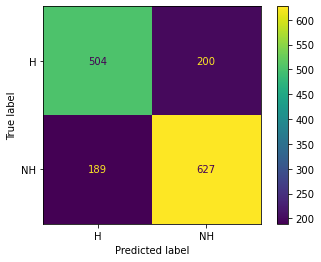

In [16]:
# XGBoost
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='rmse')
y_pred_test = basic_train_and_test(xgb_clf, X_train, X_test, y_train, y_test)
cm = get_confusion_matrix(xgb_clf, y_pred_test, y_test)
display_cm(xgb_clf, cm)
#extreme overfitting

# Hyper-Parameter Tuning

In [17]:
def parameter_tuning(X_train, X_test, y_train, y_test, model, tuned_parameters, include_grid=False):
    
    scores = ['accuracy']
    
    best_parameters = []

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(
            model, tuned_parameters, scoring=score
        )
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        best_parameters.append(clf.best_params_)
        print(clf.best_params_)
        print()
        if include_grid:
            print("Grid scores on development set:")
            print()
            means = clf.cv_results_['mean_test_score']
            stds = clf.cv_results_['std_test_score']
            for mean, std, params in zip(means, stds, clf.cv_results_['params']):
                print("%0.3f (+/-%0.03f) for %r"
                      % (mean, std * 2, params))
            print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()
        
    return best_parameters


tuned_log_parameters = [{'solver': ['lbfgs'], 'max_iter': [200, 500],
                         'C': [1, 10, 100, 1000], 'class_weight': ['balanced'],
                         'penalty': ['l2']},
                    {'solver': ['liblinear'], 'max_iter': [200, 500],
                         'C': [1, 10, 100, 1000], 'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2']}]

tuned_nn_parameters = [{'solver': ['adam'], 'max_iter': [1000],
                     'hidden_layer_sizes': [(12,12), (12,12,12)], 'activation': ['tanh', 'relu'],
                     'alpha': [1e-3,1e-4], 'learning_rate': ['constant', 'invscaling'], 
                     'learning_rate_init': [0.001, 0.01]}]

tuned_svm_parameters = [{'C': [1, 3, 10, 30, 100, 1000], 
              'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1],
              'kernel': ['rbf']}]

tuned_xgb_parameters = [{
        'min_child_weight': [1, 3],
        'gamma': [0.3, 0.5],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [4, 5],
        'n_estimators': [50],
        'objective': ['binary:logistic'],
        'eval_metric': ['mae']
        }]

best_log_parameters = parameter_tuning(X_train, X_test, y_train, y_test, LogisticRegression(), tuned_log_parameters)
best_svm_parameters = parameter_tuning(X_train, X_test, y_train, y_test, SVC(), tuned_svm_parameters)
best_nn_parameters = parameter_tuning(X_train, X_test, y_train, y_test, MLPClassifier(), tuned_nn_parameters)
best_xgb_parameters = parameter_tuning(X_train, X_test, y_train, y_test, xgb.XGBClassifier(), tuned_xgb_parameters)


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 1, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           H       0.75      0.80      0.77       704
          NH       0.81      0.77      0.79       816

    accuracy                           0.78      1520
   macro avg       0.78      0.78      0.78      1520
weighted avg       0.78      0.78      0.78      1520


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           H       0.78      0.80  

/home/ruifmf/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ruifmf/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Best parameters set found on development set:

{'colsample_bytree': 0.8, 'eval_metric': 'mae', 'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 50, 'objective': 'binary:logistic', 'subsample': 0.6}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           H       0.73      0.71      0.72       704
          NH       0.76      0.77      0.77       816

    accuracy                           0.75      1520
   macro avg       0.74      0.74      0.74      1520
weighted avg       0.75      0.75      0.75      1520




In [18]:
print("Logistic Regression with optimal parameters")
clf_log_opt = LogisticRegression()
clf_log_opt.set_params(**best_log_parameters[0])
y_pred_test = basic_train_and_test(clf_log_opt, X_train, X_test, y_train, y_test)

print("SVM with optimal parameters")
clf_svm_opt = SVC()
clf_svm_opt.set_params(**best_svm_parameters[0])
y_pred_test = basic_train_and_test(clf_svm_opt, X_train, X_test, y_train, y_test)

print("Neural Network with optimal parameters")
clf_nn_opt = MLPClassifier()
clf_nn_opt.set_params(**best_nn_parameters[0])
y_pred_test = basic_train_and_test(clf_nn_opt, X_train, X_test, y_train, y_test)

print("XGBoost with optimal parameters")
clf_xgb_opt = xgb.XGBClassifier()
clf_xgb_opt.set_params(**best_xgb_parameters[0])
y_pred_test = basic_train_and_test(clf_xgb_opt, X_train, X_test, y_train, y_test)

Logistic Regression with optimal parameters
F1 score and accuracy score for training set: 0.7839 , 0.7838.
F1 score and accuracy score for test set: 0.7812 , 0.7809.
SVM with optimal parameters
F1 score and accuracy score for training set: 0.8321 , 0.8322.
F1 score and accuracy score for test set: 0.8008 , 0.8007.
Neural Network with optimal parameters
F1 score and accuracy score for training set: 0.8119 , 0.8121.
F1 score and accuracy score for test set: 0.7943 , 0.7941.
XGBoost with optimal parameters
F1 score and accuracy score for training set: 0.8230 , 0.8232.
F1 score and accuracy score for test set: 0.7458 , 0.7461.


/home/ruifmf/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ruifmf/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


# K-Fold CV

In [19]:
def kfold_test(X_train, y_train, X_test, y_test, clf, k):
    kf = KFold(n_splits=k, shuffle=True)
    
    scores = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=k, return_estimator=True)

    avg_acc_score = sum(scores['test_score'])/k

    print('Accuracy of each fold - {}'.format(scores['test_score']))
    print('Avg accuracy : {}'.format(avg_acc_score))
    
    best_estimator = scores['estimator'][np.argmax(scores['test_score'])]

    y_pred_test = best_estimator.predict(X_test)
    acc_test = sum(y_test == y_pred_test) / float(len(y_pred_test))
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    print("Using the best estimator from CV:")
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1_test , acc_test))
    
    return y_pred_test


## Optimal Logistic Regression with K-Fold CV

Accuracy of each fold - [0.78508772 0.78245614 0.79210526 0.77017544]
Avg accuracy : 0.7824561403508772
Using the best estimator from CV:
F1 score and accuracy score for test set: 0.7832 , 0.7829.


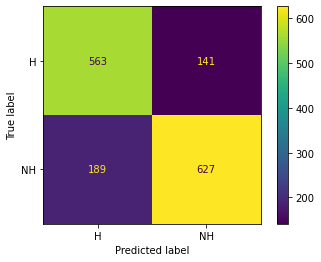

In [20]:
# Logistic Regression
y_pred_test = kfold_test(X_train, y_train, X_test, y_test, clf_log_opt, 4)
cm = get_confusion_matrix(clf_log_opt, y_pred_test, y_test)
display_cm(clf_log_opt, cm)

## Optimal SVM with K-Fold CV

Accuracy of each fold - [0.80263158 0.79035088 0.80350877 0.79736842]
Avg accuracy : 0.7984649122807017
Using the best estimator from CV:
F1 score and accuracy score for test set: 0.8015 , 0.8013.


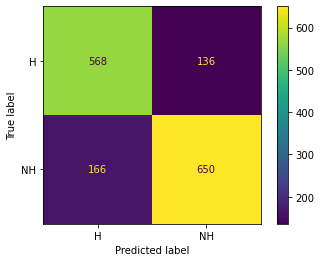

In [21]:
# SVM
y_pred_test = kfold_test(X_train, y_train, X_test, y_test, clf_svm_opt, 4)
cm = get_confusion_matrix(clf_svm_opt, y_pred_test, y_test)
display_cm(clf_svm_opt, cm)

## Optimal Neural Network with K-Fold CV

Accuracy of each fold - [0.79649123 0.78859649 0.79649123 0.7877193 ]
Avg accuracy : 0.7923245614035088
Using the best estimator from CV:
F1 score and accuracy score for test set: 0.7950 , 0.7947.


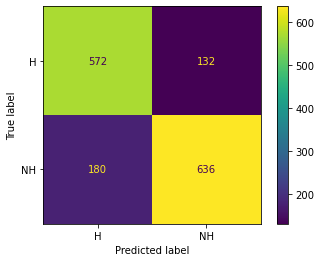

In [22]:
# NN
y_pred_test = kfold_test(X_train, y_train, X_test, y_test, clf_nn_opt, 4)
cm = get_confusion_matrix(clf_nn_opt, y_pred_test, y_test)
display_cm(clf_nn_opt, cm)

## Optimal XGBoost with K-Fold CV

/home/ruifmf/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ruifmf/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Accuracy of each fold - [0.71140351 0.7245614  0.71754386 0.7377193 ]
Avg accuracy : 0.7228070175438597
Using the best estimator from CV:
F1 score and accuracy score for test set: 0.7482 , 0.7480.


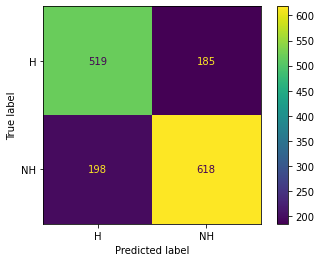

In [23]:
# XGBoost
y_pred_test = kfold_test(X_train, y_train, X_test, y_test, clf_xgb_opt, 4)
cm = get_confusion_matrix(clf_xgb_opt, y_pred_test, y_test)
display_cm(clf_xgb_opt, cm)
#extreme overfitting

# Ensemble Voting

Accuracy of each fold - [0.79736842 0.79385965 0.80789474 0.78157895]
Avg accuracy : 0.7951754385964912
Using the best estimator from CV:
F1 score and accuracy score for test set: 0.7976 , 0.7974.


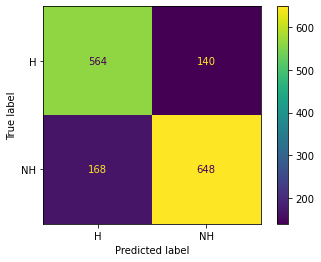

In [24]:
#Using voting method, droped the xgboost model because it was clearly lacking

eclf = VotingClassifier(estimators=[('mlp',clf_nn_opt), ('lr',clf_log_opt), ('svm', clf_svm_opt)], voting='hard')

y_pred_test = kfold_test(X_train, y_train, X_test, y_test, eclf, 4)
cm = get_confusion_matrix(clf_log, y_pred_test, y_test)
display_cm(clf_log, cm)

## With 3 of each model

Accuracy of each fold - [0.79473684 0.79385965 0.81052632 0.77807018]
Avg accuracy : 0.7942982456140351
Using the best estimator from CV:
F1 score and accuracy score for test set: 0.7943 , 0.7941.


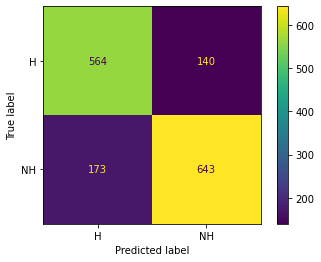

In [25]:
def gen_models():
    models = []
    for i in range(3):
        clf_nn_opt = MLPClassifier()
        clf_nn_opt.set_params(**best_nn_parameters[0])
        models.append(('mlp'+str(i), clf_nn_opt))

        clf_svm_opt = SVC()
        clf_svm_opt.set_params(**best_svm_parameters[0])
        models.append(('svm'+str(i), clf_svm_opt))

        clf_log_opt = LogisticRegression()
        clf_log_opt.set_params(**best_log_parameters[0])
        models.append(('lr'+str(i), clf_log_opt))

    return models

eclf_9model = VotingClassifier(estimators=gen_models(), voting='hard')

y_pred_test = kfold_test(X_train, y_train, X_test, y_test, eclf_9model, 4)
cm = get_confusion_matrix(clf_log, y_pred_test, y_test)
display_cm(clf_log, cm)

# Accuracy per class of final model

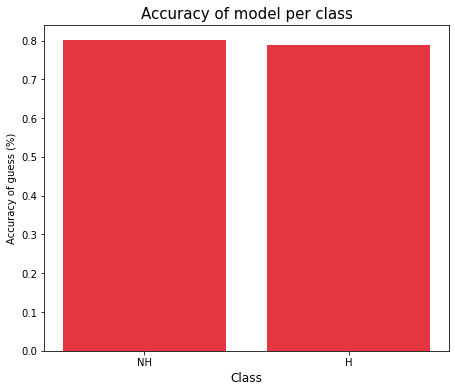

In [29]:
def class_acc(y_pred_test, X_train, X_test, y_train, y_test):
    cm = confusion_matrix(y_test, y_pred_test)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize = (7.25,6))
    plt.bar(['NH','H'], [cm[i][i] for i in range(2)], color="#e33641")
    plt.xlabel('Class',fontsize=12)
    plt.ylabel('Accuracy of guess (%)')
    plt.title('Accuracy of model per class',fontsize=15)
    plt.show()

class_acc(y_pred_test, X_train, X_test, y_train, y_test)